In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import networkx as nx
from nxpd import nxpdParams, draw
nxpdParams['show'] = 'ipynb'
import operator
%matplotlib inline

In [25]:
PATH_TO_FILTERED_VDJDB = "vdjdb.txt"

In [26]:
df = pd.read_table(PATH_TO_FILTERED_VDJDB)

In [27]:
df.head()

,cdr3,antigen.epitope,antigen.gene,antigen.species,v.segm,j.segm,v.end,j.start,mhc.a,mhc.b,mhc.class
0,CASSFSGTQYF,NLVPMVATV,p65,CMV,TRBV28*01,TRBJ2-3*01,4,7,HLA-A*02,B2M,MHCI
1,CASSLGTSGGNEQFF,NLVPMVATV,p65,CMV,TRBV7-6*01,TRBJ2-1*01,5,10,HLA-A*02,B2M,MHCI
2,CASSQVEEFHGELFF,GILGFVFTL,M1,InfluenzaA,TRBV7-9*01,TRBJ2-2*01,4,10,HLA-A*02,B2M,MHCI
3,CASRTQRWETQYF,QASQEVKNW,p24,HIV-1,TRBV27*01,TRBJ2-5*01,3,8,HLA-B*57,B2M,MHCI
4,CASSPRQGLEGANVLTF,LPPIVAKEI,Int,HIV-1,TRBV7-9*01,TRBJ2-6*01,4,10,HLA-B*42:01,B2M,MHCI


In [28]:
unique_eps = df['antigen.epitope'].unique()
print(unique_eps)

['NLVPMVATV' 'GILGFVFTL' 'QASQEVKNW' 'LPPIVAKEI' 'HPKVSSEVHI' 'TPRVTGGGAM'
 'GTSGSPIVNR' 'VTEHDTLLY' 'GLCTLVAML' 'LLWNGPMAV' 'YVLDHLIVV' 'KAFSPEVIPMF'
 'AMFWSVPTV' 'GTSGSPIINR' 'GPGHKARVL' 'IPSINVHHY' 'LLLGIGILV' 'EPLPQGQLTAY'
 'ELAGIGILTV' 'KRWIILGLNK' 'LPRRSGAAGA' 'FRDYVDRFYKTLRAEQASQE' 'CINGVCWTV'
 'ISPRTLNAW' 'RAKFKQLL' 'FLKEKGGL' 'RPRGEVRFL' 'PKYVKQNTLKLAT' 'FLYNLLTRV'
 'NLSALGIFST' 'IVTDFSVIK' 'ATDALMTGY' 'KLVALGINAV' 'TPGPGVRYPL'
 'KRWIIMGLNK' 'TPQDLNTML' 'FPRPWLHGL' 'GTSGSPIIDK' 'EIYKRWII' 'IIKDYGKQM'
 'ARMILMTHF' 'QVPLRPMTYK' 'HSKKKCDEL' 'SLYNTVATL']


In [29]:
# from Bio import pairwise2
# from Bio.pairwise2 import format_alignment
# from Bio.SubsMat import MatrixInfo as matlist
# from math import exp

# D_ep = np.ndarray(shape=(len(unique_eps), len(unique_eps)))
# matrix = matlist.blosum62

# for i in range(len(unique_eps)):
#     for j in range(len(unique_eps)):
#         #print(pairwise2.align.globaldx(unique_eps[i], unique_eps[j], matrix))
#         D_ep[i, j] = pairwise2.align.globaldx(unique_eps[i], unique_eps[j], matrix)[0][2]

# print(np.max(D_ep))
# D_ep = D_ep / np.max(D_ep)  
        
# plt.imshow(D_ep)

In [30]:
PATH_TO_DIST = "pairwise_distances.txt/data"
dist = pd.read_table(PATH_TO_DIST)    
print(dist.head())

print(len(dist))

       species gene               to            from  indels  substs  \
0  HomoSapiens  TRA  CAAAATPGNTGKLIF  CAAFDSGNTGKLIF       1       3   
1  HomoSapiens  TRA  CAAAATPGNTGKLIF   CAAFPGNTDKLIF       2       2   
2  HomoSapiens  TRA  CAAAATPGNTGKLIF   CAAPGENTGKLIF       2       2   
3  HomoSapiens  TRA  CAAAATPGNTGKLIF   CAAPPRNTGKLIF       2       2   
4  HomoSapiens  TRA  CAAAATPGNTGKLIF   CAAPPSNTGKLIF       2       2   

         ag1        ag2  
0  NLVPMVATV  GILGFVFTL  
1  GILGFVFTL  GILGFVFTL  
2  GILGFVFTL  GILGFVFTL  
3  GILGFVFTL  GILGFVFTL  
4  GILGFVFTL  GILGFVFTL  
4594734


In [31]:
grouped = df.groupby('antigen.epitope')
for it in grouped:
    cdrs = set(it[1]['cdr3'])
    d = dist.loc[(dist['to'].isin(cdrs)) & dist['from'].isin(cdrs)]
    print(Counter(it[1]['antigen.species']))
    print("N paires is pairwise_distances.txt: {}".format(len(d)))

    tmp = ["subs_" + str(row[0]) + "_ind_" + str(row[1]) for index, row in d[['substs', 'indels']].iterrows()]
    print(sorted(dict(Counter(tmp)).items(), key=operator.itemgetter(1), reverse=True))

    print("\n======\n")

Counter({'HomoSapiens': 83})
N paires is pairwise_distances.txt: 394
[('subs_3_ind_2', 130), ('subs_3_ind_1', 92), ('subs_2_ind_1', 50), ('subs_3_ind_0', 38), ('subs_2_ind_2', 36), ('subs_1_ind_0', 22), ('subs_1_ind_1', 14), ('subs_2_ind_0', 12)]


Counter({'HCV': 50})
N paires is pairwise_distances.txt: 158
[('subs_3_ind_1', 38), ('subs_3_ind_2', 34), ('subs_3_ind_0', 32), ('subs_2_ind_0', 20), ('subs_1_ind_0', 10), ('subs_2_ind_1', 10), ('subs_2_ind_2', 8), ('subs_1_ind_1', 6)]


Counter({'HCV': 165})
N paires is pairwise_distances.txt: 784
[('subs_3_ind_0', 364), ('subs_2_ind_0', 204), ('subs_3_ind_1', 94), ('subs_1_ind_0', 60), ('subs_3_ind_2', 28), ('subs_2_ind_1', 20), ('subs_2_ind_2', 8), ('subs_0_ind_2', 2), ('subs_1_ind_2', 2), ('subs_1_ind_1', 2)]


Counter({'HCV': 130})
N paires is pairwise_distances.txt: 328
[('subs_3_ind_2', 116), ('subs_3_ind_1', 72), ('subs_3_ind_0', 46), ('subs_2_ind_2', 34), ('subs_2_ind_1', 20), ('subs_2_ind_0', 18), ('subs_1_ind_0', 10), ('subs_1_ind



Counter({'HomoSapiens': 112})
N paires is pairwise_distances.txt: 506
[('subs_3_ind_2', 196), ('subs_3_ind_1', 118), ('subs_2_ind_2', 86), ('subs_2_ind_1', 32), ('subs_3_ind_0', 24), ('subs_1_ind_2', 22), ('subs_2_ind_0', 10), ('subs_1_ind_1', 6), ('subs_1_ind_0', 6), ('subs_0_ind_1', 4), ('subs_0_ind_2', 2)]


Counter({'CMV': 4405})
N paires is pairwise_distances.txt: 372290
[('subs_3_ind_2', 155894), ('subs_3_ind_1', 99392), ('subs_2_ind_2', 49100), ('subs_2_ind_1', 25562), ('subs_3_ind_0', 21162), ('subs_1_ind_2', 9136), ('subs_2_ind_0', 6174), ('subs_1_ind_1', 3800), ('subs_1_ind_0', 1238), ('subs_0_ind_2', 614), ('subs_0_ind_1', 218)]


Counter({'InfluenzaA': 294})
N paires is pairwise_distances.txt: 1736
[('subs_3_ind_2', 752), ('subs_3_ind_1', 426), ('subs_2_ind_2', 238), ('subs_2_ind_1', 128), ('subs_3_ind_0', 106), ('subs_1_ind_2', 28), ('subs_2_ind_0', 26), ('subs_1_ind_0', 16), ('subs_1_ind_1', 12), ('subs_0_ind_2', 4)]


Counter({'HIV-1': 30})
N paires is pairwise_distanc

In [32]:
for it in grouped:
    if list(dict(Counter(list(it[1]['antigen.species']))).keys())[0] == 'InfluenzaA':
        cdrs = set(it[1]['cdr3'])
        d = dist.loc[(dist['to'].isin(cdrs)) & dist['from'].isin(cdrs)]

        d_unique = d['to'].unique()
        M = np.zeros((len(d_unique), len(d_unique)))
        M_labels = {}
        for i in range(len(d_unique)):
            M_labels[d_unique[i]] = i

        for index, row in d[['substs', 'indels']].iterrows():
            if row[0] <= 3 & row[1] <= 1:
                M[M_labels[d['to'][index]], M_labels[d['from'][index]]] = 1
                M[M_labels[d['from'][index]], M_labels[d['to'][index]]] = 1

        break


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.185759 to fit



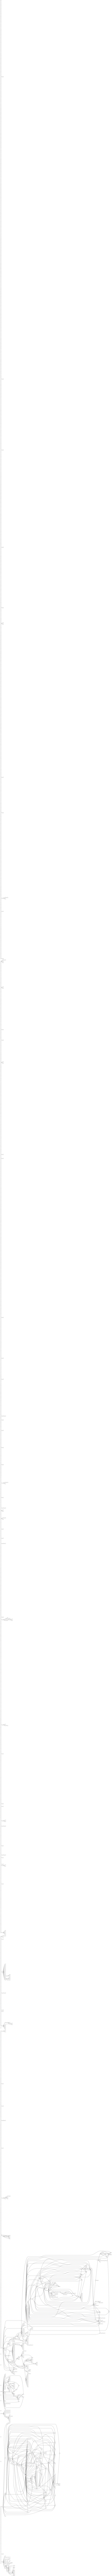

In [34]:
#plot graph

G = nx.DiGraph()
G.graph['rankdir'] = 'LR'
G.graph['dpi'] = 120
for i in range(len(M)):
    G.add_node(i)

for i in range(len(M)):
    for j in range(len(M)):
        if (M[i, j] > 0):
            G.add_edge(i, j)

draw(G)

In [35]:
# треш

In [ ]:
mult = [(k, v) for k, v in dict(Counter(df['cdr3'])).items() if v > 1]
print(mult)

In [ ]:
len(Counter(df['cdr3']))

In [ ]:
len(Counter(df['antigen.epitope']))

In [ ]:
# 1) gap penalty = -(max(vdjam) + 1)
# 2) score1 = global alignment score - gap penalty * #indels
# 3) score2(i,j) = score1(i, j) - max (score1(i,i), score2(j,j)) где i и j это два CDR3


In [ ]:
PATH_TO_VDJAM = "./alignment_matrix/vdjam.txt"

In [ ]:
m = pd.read_table(PATH_TO_VDJAM)
m.head()

In [ ]:
vdjam = {}

for index, row in m.iterrows():
    vdjam[(row['aa.1'], row['aa.2'])] = row['score']
    
gap_penalty = -(max(vdjam.values()) + 1)

print(gap_penalty)

In [ ]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment


for a in pairwise2.align.globalds("KEVLA", "EVL", vdjam, gap_penalty, gap_penalty):
    print(format_alignment(*a))

In [ ]:
import itertools
from joblib import Parallel, delayed

cdr3 = df.head(100)['cdr3']

def f(pair):
    return pairwise2.align.globalds(pair[0], pair[1], vdjam, gap_penalty - 1, gap_penalty)

results = Parallel(n_jobs=2, verbose=1, backend="threading")(map(delayed(f), itertools.combinations(cdr3, 2)))
print(results)
        


In [ ]:
def make_chunks(chunkable, n):
    """ Yield successive n-sized chunks from l.
    """
    for i in range(0, len(chunkable), n):
        yield (i,i+n)
        
chunks = list(make_chunks(range(0, len(df)), 400))
print(len(chunks))


# def f(pair):
#     return pairwise2.align.globalds(pair[0], pair[1], vdjam, gap_penalty - 1, gap_penalty)

def process_chunk(n):
    paires = list(itertools.product(df['cdr3'], df['cdr3'][chunks[n][0] : chunks[n][1]]))
    
    fname_out = "{}.txt".format(n)
    with open(fname_out, 'a') as f:
        for pair in paires:
            result = pairwise2.align.globalds(pair[0], pair[1], vdjam, gap_penalty - 1, gap_penalty)
            for it in range(len(list(result)[0])):
                f.write(str(list(result)[0][it]))
    
    
        
    #     results = Parallel(n_jobs=16, verbose=1, backend="threading")(map(delayed(f), itertools.combinations(cdr3, 2)))
    
    
    
    
process_chunk(0)

In [ ]:
list(itertools.combinations([1, 2, 3], 2))

In [ ]:
list(itertools.product([1, 2, 3], [4, 5]))